# Dealing with real data



In [1]:
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

## Loading the data

Let us assume you start with the excel file downloaded. You will first have to convert it to a more standard `.csv` format before being able to read it with pandas (actually it is possible to [read excel file](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) directly, but this is less standard and require additional installation).

- Open the Excel file in Excel and `Save as` with the format being selected as `csv utf-8`. (if you do not have excel there is a csv already available next to the excel file)
- Try loading it with the following command :

In [2]:
df = pd.read_csv('my_csv_export.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


You will notice that there is a `ParserError` reading the file (assuming you have saved it properly and are referring to its name properly). This is because the file is actually not directly properly formatted.

Open the `csv` file (right-click, open with) directly in a text editor (not Word or Wordpad!, but a pure text editor such as the Notepad, or much better VisualStudioCode).

Remember that a `csv` should have the header line of the column names as the first row, and its values delimited by `,`. Looking at the file, and exploring the options of the `read_csv` function, can you correct the line below to properly load the data?

In [2]:
df = pd.read_csv('my_csv_export.csv',
            header=1,
            delimiter=";"
           )

In [3]:
df

,School,Author,Actual Attributon,Place,Room,Title,Date,Date Acquired,Date Sold-Tranferred,Material / Technique,...,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251
0,Romaine et Florentine,Andrea Mantegna,NaN,Versailles,Cabinet de la Surintendance des Batimens,Paysage historique,XVI sec.,1695,NaN,Peinture à l'huile sur toile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Romaine et Florentine,Leonardo da Vinci,NaN,Versailles,Petite Galerie ( 1695; 1701; 1706; 1707; 1709-...,Bataille héroïque,XVII siecle,1695,NaN,Peinture à l'huile sur bois,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Romaine et Florentine,Leonardo da Vinci,NaN,Versailles,Petite Galerie (1695; 1701 ; 1706; 1 707; 1709...,Madonna with Christ Child,1493,NaN,1715.0,"peinture , peinture à l'huile; toile",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Romaine et Florentine,Leonardo da Vinci,NaN,Versailles,Petite Galerie (1709-1710),Le sauveur du monde tenant un globe,XVI sec.,1695,NaN,"peinture , peinture à l'huile ; toile",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Romaine et Florentine,Leonardo da Vinci,NaN,Versailles,Grand appartement du Roi,Saint Catherine of Alexandria,1518,1695,NaN,"peinture à l'huile, toile",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Romaine et Florentine,Francesco Trevisani,NaN,Versailles,Cabinet de la Surintendance,Saint-Jean-Baptiste,1643,1625,NaN,"peinture à l'huile, toile",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Romaine et Florentine,Giuseppe Cesari,NaN,Versailles,Cabinet des médailles,NaN,1500 - 1550,1695,NaN,"peinture à l'huile, toile",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Romaine et Florentine,Giuseppe Cesari - Cavalier d'Arpino,NaN,Versailles,Cabinet de la Surintendance,La Nativité de la Vierge,1650 - 1672,NaN,NaN,Peinture à l'huile sur toile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,Romaine et Florentine,Giuseppe Cesari - Cavalier d'Arpino,NaN,Versailles,Cabinet de la Surintendance,"Mars, Vénus et l’Amour",1507,1706,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning the data

By default, the read data is not exactly clean so let us improve that.

### Removing empty columns

First, you might have noticed that there is a very large number of empty columns, which is an artifact of the export and the fact that there are very long values in the original excel file, which makes excel creates arbitrary empty columns to fit the long values in the display.

This can be seen by listing the (more than 250) columns.

In [4]:
# Gets the index object representing the names of all the columns
df.columns

Index(['School', 'Author', 'Actual Attributon', 'Place', 'Room', 'Title',
       'Date', 'Date Acquired', 'Date Sold-Tranferred', 'Material / Technique',
       ...
       'Unnamed: 242', 'Unnamed: 243', 'Unnamed: 244', 'Unnamed: 245',
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251'],
      dtype='object', length=252)

In order to remove them, we first need to detect them. Detecting missing values can be done by directly using the method `isna()`, but it will return another `pd.Series` describing missing value at every position, and not a single boolean for the whole column. In order to find columns where there is no interesting value in, have a look at the methods [`any()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.any.html) or [`all()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.all.html)

In [4]:
def is_column_empty(serie):
    # Your code here
    return pd.isna(serie).all()

print("should be False : ", is_column_empty(df['School']))
print("should be True : ", is_column_empty(df['Unnamed: 248']))

should be False :  False
should be True :  True


Using the previous function, we can now remove the unnecessary columns. For this, simply iterate over the column names (with `df.columns` as seen above), and for each of them: test if they are empty and delete them if necessary.

**HINT:** deleting column is the same syntax as deleting elements of a dictionnary.

In [5]:
# Your code here
for col in df.columns:
    if is_column_empty(df[col]):
        del df[col]

In [6]:
# This should evaluate to True if only the non-empty columns are left
set(df.columns) == set(['School', 'Author', 'Actual Attributon', 'Place', 'Room', 'Title',
       'Date', 'Date Acquired', 'Date Sold-Tranferred', 'Material / Technique',
       'Size (cm)', 'N. Inv. Le Brun', 'Actual Location', 'ICONCLASS', '#',
       '#.1', '#.2', '#.3', 'Link', 'Unnamed: 23'])

True

In [8]:
df

,School,Author,Actual Attributon,Place,Room,Title,Date,Date Acquired,Date Sold-Tranferred,Material / Technique,Size (cm),N. Inv. Le Brun,Actual Location,ICONCLASS,#,#.1,#.2,#.3,Link,Unnamed: 23
0,Romaine et Florentine,Andrea Mantegna,NaN,Versailles,Cabinet de la Surintendance des Batimens,Paysage historique,XVI sec.,1695,NaN,Peinture à l'huile sur toile,50 x 38,242.0,"Louvre, INV 819",11 M 33,NaN,NaN,NaN,NaN,http://www.landesmuseum-mainz.de/en/sammlung/r...,NaN
1,Romaine et Florentine,Leonardo da Vinci,NaN,Versailles,Petite Galerie ( 1695; 1701; 1706; 1707; 1709-...,Bataille héroïque,XVII siecle,1695,NaN,Peinture à l'huile sur bois,88 x 57,NaN,"Paris, musée du Louvre (INV. 613)",11 G 31 (+3),NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Mona_Lisa,NaN
2,Romaine et Florentine,Leonardo da Vinci,NaN,Versailles,Petite Galerie (1695; 1701 ; 1706; 1 707; 1709...,Madonna with Christ Child,1493,NaN,1715.0,"peinture , peinture à l'huile; toile",72 x 95.5,NaN,"Louvre, INV 585",71 H 15 21,NaN,NaN,NaN,NaN,https://www.hermitagemuseum.org/wps/portal/her...,NaN
3,Romaine et Florentine,Leonardo da Vinci,NaN,Versailles,Petite Galerie (1709-1710),Le sauveur du monde tenant un globe,XVI sec.,1695,NaN,"peinture , peinture à l'huile ; toile",168 x 119,22.0,Louvre; INV 595,11 F 6 (+3),NaN,NaN,NaN,NaN,https://it.wikipedia.org/wiki/Belle_Ferronnière,NaN
4,Romaine et Florentine,Leonardo da Vinci,NaN,Versailles,Grand appartement du Roi,Saint Catherine of Alexandria,1518,1695,NaN,"peinture à l'huile, toile",214 x 351,228.0,"Collezione privata, Monaco di Baviera",94 M 22 1,NaN,NaN,NaN,NaN,http://www.lecoindelenigme.com/Salvator-Mundi.htm,NaN
5,Romaine et Florentine,Leonardo da Vinci,NaN,Paris,Petite Galerie (1695;1701;1706;1707; 1709-1710),"La Vierge, l’enfant Jesus et Sainte Martine",1508-1513,1695,1760.0,Huile sur panneau de noix transférée sur toile,199 x 122,283.0,"Louvre, INV 135",NaN,NaN,NaN,NaN,NaN,http://www2.culture.gouv.fr/public/mistral/joc...,NaN
6,Romaine et Florentine,Leonardo da Vinci,NaN,Versailles,Petite Galerie du Roy,L'ENLEVEMENT D'HELENE,XVI sec. 2q,1695,NaN,"peinture , peinture à l'huile ; bois",168 x 130,368.0,Toulouse; musée des Augustins,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Bacchus_(Leonardo),NaN
7,Romaine et Florentine,Leonardo da Vinci,Lorenzo di Credi,Versailles,Petite Galerie du Roy,Mariage mystique de Sainte Catherine,1650 -1680,NaN,NaN,Peinture à l'huile sur toile,NaN,367.0,NaN,59 B 31,NaN,NaN,NaN,NaN,http://www2.culture.gouv.fr/public/mistral/joc...,NaN
8,Romaine et Florentine,Leonardo da Vinci,NaN,Versailles,Cabinet de la Surintendance,Diane et Actéon,1650 - 1672,1793,NaN,huile sur toile,44 x 32,2.0,Louvre ; INV 1060,73 B 82 11,NaN,NaN,NaN,NaN,NaN,NaN
9,Romaine et Florentine,Leonardo da Vinci,NaN,Versailles,Petite Galerie du Roy,Apollon et de Daphné,1518,1695,NaN,"peinture , peinture à l'huile ; toile",81 × 65,16.0,NaN,45 H 3,11 G,NaN,NaN,NaN,http://cartelfr.louvre.fr/cartelfr/visite?srv=...,NaN


### Standardizing types

Pandas tries to convert the columns to the best data types and tries to separate categorical and numerical columns.

Looking at the data in the `DataFrame` and the current data type (printed with the command below). Identify which column is not properly identified as being numerical.

In [9]:
# Gives the listing of current columns with their associated data type
df.dtypes

School                   object
Author                   object
Actual Attributon        object
Place                    object
Room                     object
Title                    object
Date                     object
Date Acquired            object
Date Sold-Tranferred    float64
Material / Technique     object
Size (cm)                object
N. Inv. Le Brun         float64
Actual Location          object
ICONCLASS                object
#                        object
#.1                      object
#.2                      object
#.3                      object
Link                     object
Unnamed: 23              object
dtype: object

Indeed, you can see directly in Excel or here that there is one value in that column can not be converted to numeric directly (line 14 to be exact)

In [10]:
df['Date Acquired'][10:20]

10        1695
11        1537
12        1695
13         NaN
14    XVI sec.
15         NaN
16        1683
17        1695
18        1695
19         NaN
Name: Date Acquired, dtype: object

This can create issues, for instance it is impossible to plot the joint plot of the dates of acquisition and selling. The following plotting command will give the appropriate error.

ValueError: could not convert string to float: 'XVI sec.'

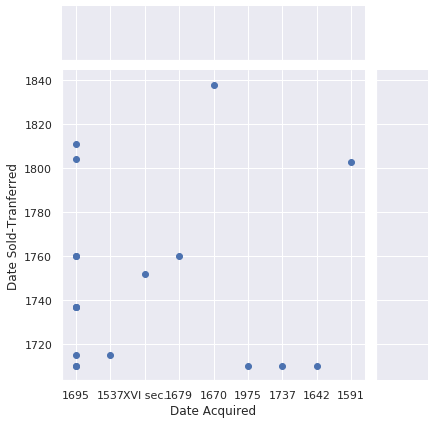

In [11]:
sns.jointplot('Date Acquired', 'Date Sold-Tranferred', data=df)

In order to convert a column to a numeric one, the function `pd.to_numeric` can be used. By default, it will fail because of the string value, look at the options of that function so that the wrong value is automatically dropped (by being converted to `np.nan`). 

Override the column in the `DataFrame` by assigning the converted column with the same name. (Reminder: it is still the same syntax as a dictionnary assignment)

In [7]:
# Your code here
df['Date Acquired'] = pd.to_numeric(df['Date Acquired'], errors='coerce')

In [8]:
# Should be True now
df['Date Acquired'].dtype == np.float

True

Now the jointplot should display properly.

This visualization does not actually bring a lot of information as it only display the data points where both the acquisition date AND the selling date is known, which does not represent many data points.

However, looking more closely at the previous plot, you might notice that some configurations do not seem possible and show wrong data. Can an object be sold before it is acquired???

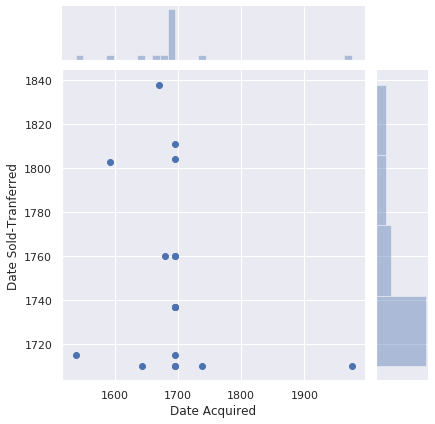

In [9]:
sns.jointplot('Date Acquired', 'Date Sold-Tranferred', data=df)

Using filtering, display the two cases where the data is wrong (so that one could correct it in the original data file for instance, not necessary to correct it for the sake of this exercise though).

In [10]:
# Your code here
df[df['Date Acquired'] > df['Date Sold-Tranferred']]

,School,Author,Actual Attributon,Place,Room,Title,Date,Date Acquired,Date Sold-Tranferred,Material / Technique,Size (cm),N. Inv. Le Brun,Actual Location,ICONCLASS,#,#.1,#.2,#.3,Link,Unnamed: 23
62,Romaine et Florentine,Matteo Rosselli,Quentin Matsys,versailles,Petite Galerie ( 1695; 1701; 1706; 1707; 1709-...,La Charité,NaN,1975.0,1710.0,"peinture à l'huile, toile",31 x 63,152.0,musée Condé; PE 79,61 B 11 1,NaN,NaN,NaN,NaN,http://www2.culture.gouv.fr/public/mistral/joc...,NaN
68,Romaine et Florentine,Salvatore Rosa,"Angelo di Cosimo, dit Bronzino",Versailles,Saint Germain en Laye,"La vierge, l'enfant et le petite Saint Jean qu...",1518,1737.0,1710.0,Peinture à l'huile sur toile,47.5 X 66,253.0,Louvre; INV 424,NaN,NaN,NaN,NaN,NaN,http://www2.culture.gouv.fr/public/mistral/joc...,NaN


## Extracting the main Iconography

Each record has a full ICONCLASS specification. [ICONCLASS](https://en.wikipedia.org/wiki/Iconclass) is a hierarchical iconographic classification system that is very involved. Here we take a simplistic approach and just extract the top-level (first digit) of the specification.

### Installation of the iconclass python package

In order to work with a more readable version of the ICONCLASS system, someone nicely made a python package that maps the obscure definitions to their textual representation.

Installation can directly be done with the following command (special jupyter notebook shell command, starting with `!`) calling the python package manager `pip`

In [11]:
!pip install iconclass

In [12]:
# Import the newly installed package (needs to download a small database at the first import)
import iconclass
# Example usage
iconclass.get('1')

{'c': ['10', '11', '12', '13', '14'],
 'txt': {'pl': 'Religia i Magia',
  'it': 'Religione e Magia',
  'pt': 'Religião e Magia',
  'zh': '宗教和巫術',
  'hu': 'Vallás és mágia',
  'nl': 'Religie en magie',
  'de': 'Religion und Magie',
  'fi': 'Uskonto ja maaginen',
  'fr': 'Religion et Magie',
  'es': 'La religión y la magia',
  'en': 'Religion and Magic'},
 'kw': {'it': ['soprannaturale'],
  'pt': ['sobrenatural'],
  'nl': ['bovennatuurlijk'],
  'de': ['uebernatuerlich'],
  'fr': ['supra-naturelle'],
  'es': ['sobrenatural'],
  'en': ['supernatural']},
 'n': '1',
 'p': ['1']}

This package allow us to easily convert a ICONCLASS id to a dictionnary containing all the necessary information. The sub-classes in the tree of classification, the textual and keyword representation in multiple languages, and the parent classes.

In [13]:
iconclass.get('11A')

{'c': ['11A1',
  '11A2',
  '11A3',
  '11A(+0)',
  '11A(+1)',
  '11A(+2)',
  '11A(+3)',
  '11A(+4)',
  '11A(+5)'],
 'r': ['11C'],
 'txt': {'it': 'Divinità, Dio (in generale) ~ religione cristiana',
  'pt': 'Divindade, Deus (em geral) ~ religião cristã',
  'zh': '神，上帝（一般性） 〜基督教',
  'hu': 'Istenség, Isten (általában) ~ keresztény vallás',
  'nl': 'Goddelijkheid, God (algemeen)',
  'de': 'Gottheit, Gott (im allgemeinen) in der christlichen Religion',
  'fr': 'Dieu (en général) ~ religion chrétienne',
  'es': 'Dios, Dios (en general) ~ religión cristiana',
  'en': 'Deity, God (in general) ~ Christian religion'},
 'kw': {'it': ['Dio'],
  'pt': ['Deus'],
  'nl': ['God'],
  'de': ['Gott'],
  'fi': ['Jumala'],
  'fr': ['Dieu'],
  'es': ['Dios'],
  'en': ['God']},
 'n': '11A',
 'p': ['1', '11', '11A']}

In [14]:
iconclass.get('11A(+5)')

{'c': [],
 'r': ['11C'],
 'txt': {'it': 'Divinità, Dio (in generale) ~ religione cristiana (+ donatore/i, supplice/i, con o senza santo/i patrono/i)',
  'pt': 'Divindade, Deus (em geral) ~ religião cristã',
  'zh': '神，上帝（一般性） 〜基督教',
  'hu': 'Istenség, Isten (általában) ~ keresztény vallás',
  'nl': 'Goddelijkheid, God (algemeen) (+ donor(en), smekeling(en), al dan niet met beschermheilige(n))',
  'de': 'Gottheit, Gott (im allgemeinen) in der christlichen Religion (+ Stifter, Bittsteller, mit oder ohne Schutzheilige(n))',
  'fr': 'Dieu (en général) ~ religion chrétienne (+ donateur(s), suppliant(s), avec ou sans saint(s) patron(s))',
  'es': 'Dios, Dios (en general) ~ religión cristiana',
  'en': 'Deity, God (in general) ~ Christian religion (+ donor(s), supplicant(s), whether or not with patron saint(s))',
  'pl': 'None (+ donatorzy, suplikanci, z (bez) świętymi patronami)'},
 'kw': {'it': ['Dio'],
  'pt': ['Deus'],
  'nl': ['God'],
  'de': ['Gott'],
  'fi': ['Jumala'],
  'fr': ['Dieu'

### Simple parsing: the ICONCLASS column

Using this package we can now parse, for each record with an ICONCLASS value, its main category.

In [15]:
def extract_main_iconography(iconclass_string):
    # Your code here
    return iconclass.get(iconclass_string[:1])['txt']['en']

print('Should be "Religion and Magic" : ', extract_main_iconography("11 M 33"))
print('Should be "Classical Mythology and Ancient History" : ', extract_main_iconography("94 M 22 1"))

Should be "Religion and Magic" :  Religion and Magic
Should be "Classical Mythology and Ancient History" :  Classical Mythology and Ancient History


Now use the `apply` method on the `ICONCLASS` column to create a new column with the textual value of the main iconography. Careful that you might need to filter the `NaN` values of the column before using `apply`.

Add the created column to the original `DataFrame` with a name of your choice.

In [16]:
# Your code here
df['ICON_MAIN'] = df.ICONCLASS[df.ICONCLASS.notna()].apply(extract_main_iconography)

Using seaborn `countplot` (or any other method), plot the distribution of records per iconography, what seemed to be the two most important genres?

(Hint: depending on how you do it the labels of the plot might overlap each other making them unreadable. To rotate them, use `plt.xticks(rotation=90)`)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

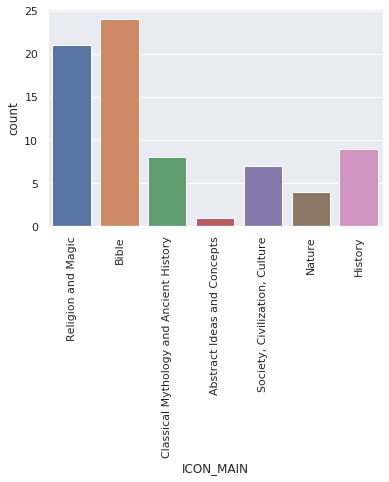

In [17]:
# Your code here
sns.countplot(x='ICON_MAIN', data=df)
plt.xticks(rotation=90)

## Harder parsing : extracting the size information

Since not every artwork is the same size, we want to not only measure the number of artworks owned at that time but also the surface they occupied.

For this let us create a function that takes the information of size in the data and tries to separate the height and the width information. Using `split` and `replace` you should be able to parse all but 4 valid values.

In [18]:
def parse_size(s):
    try:
        # Your code here
        h,w = s.replace('X', 'x').replace('×', 'x').replace(',', '.').split('x')
        h,w = float(h), float(w)
        return h, w
    except Exception as e:
        print(f"Can not parse: {s}")
        return np.nan, np.nan
    
df['Size (cm)'].apply(parse_size)

Can not parse: nan
Can not parse: nan
Can not parse: nan
Can not parse: nan
Can not parse: nan
Can not parse: nan
Can not parse: 97 d
Can not parse: nan
Can not parse: 62 D
Can not parse: nan
Can not parse: 62 d
Can not parse: nan
Can not parse: 34 x 45.5 (ovale)
Can not parse: nan


0       (50.0, 38.0)
1       (88.0, 57.0)
2       (72.0, 95.5)
3     (168.0, 119.0)
4     (214.0, 351.0)
           ...      
83      (99.0, 83.0)
84    (178.0, 122.0)
85     (122.0, 80.0)
86    (168.0, 132.0)
87        (nan, nan)
Name: Size (cm), Length: 88, dtype: object

In [19]:
# This line is a bit complex so I give it to you directly
df['Height'], df['Width'] = zip(*df['Size (cm)'].apply(parse_size))

# Checking that the column has proper typing
print('Should be True : ', df['Height'].dtype == np.float)
print('Should be True : ', df['Width'].dtype == np.float)

Can not parse: nan
Can not parse: nan
Can not parse: nan
Can not parse: nan
Can not parse: nan
Can not parse: nan
Can not parse: 97 d
Can not parse: nan
Can not parse: 62 D
Can not parse: nan
Can not parse: 62 d
Can not parse: nan
Can not parse: 34 x 45.5 (ovale)
Can not parse: nan
Should be True :  True
Should be True :  True


Here is another variant in order to do the same thing but sligthly differently. Instead of using `apply` only on a column we use it direclty on the whold dataframe, and work on a full record (row). The same parsing code should then be used and we know return a dictionnary. This column of dictionnary is then `expanded` to directly make a new dataframe with the values of the two newly created columns.

In [20]:
def parse_size_2(record):
    s = record['Size (cm)']
    try:
        # Same code as above
        h,w = s.replace('X', 'x').replace('×', 'x').replace(',', '.').split('x')
        return {'Height': float(h), 'Width': float(w)}
    except Exception as e:
        print(f"Can not parse: {s}")
        return {'Height': np.nan, 'Width': np.nan}

# Generates directly a new DataFrame with two columns 'Height' and 'Width'. It can be added with `df.merge(...)`
df.apply(parse_size_2, result_type='expand', axis='columns')

Can not parse: nan
Can not parse: nan
Can not parse: nan
Can not parse: nan
Can not parse: nan
Can not parse: nan
Can not parse: 97 d
Can not parse: nan
Can not parse: 62 D
Can not parse: nan
Can not parse: 62 d
Can not parse: nan
Can not parse: 34 x 45.5 (ovale)
Can not parse: nan


,Height,Width
0,50.0,38.0
1,88.0,57.0
2,72.0,95.5
3,168.0,119.0
4,214.0,351.0
...,...,...
83,99.0,83.0
84,178.0,122.0
85,122.0,80.0
86,168.0,132.0


We have now separated properly the height and width of each painting. The area can then easily be computed and added as an additional column named 'Area'. Looking at the example below of how mathematical operators easily propagate on full columns, add the corresponding 'Area' column to the `DataFrame`

In [21]:
# Example
df['Date Sold-Tranferred'] - df['Date Acquired']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
83   NaN
84   NaN
85   NaN
86   NaN
87   NaN
Length: 88, dtype: float64

In [22]:
# Your code here
df['Area'] = df['Height'] * df['Width']

Now using the `swarmplot` of seaborn, look at the distribution of the size of paintings according to their main iconography. What can you say?

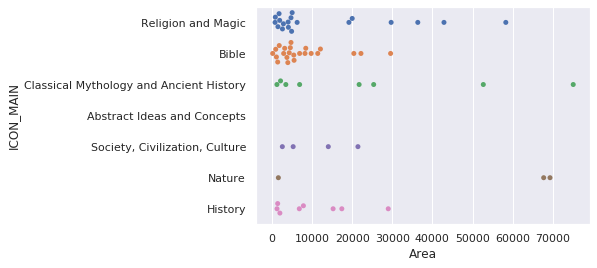

In [23]:
# Your code here
sns.swarmplot('Area', 'ICON_MAIN', data=df)

### Custom Aggregation

In order to compute exactly the number of painting in each category and the combined areas of all the paintings in each category we need to aggregate the information.

Try to use `groupby` on the Dataframe and then apply `sum` or `count` to create aggregated series. You might have to google a bit around to understand how `groupby` works.

In [24]:
# your code here
df.groupby('ICON_MAIN').sum()

,Date Acquired,Date Sold-Tranferred,N. Inv. Le Brun,Height,Width,Area
ICON_MAIN,,,,,,
Abstract Ideas and Concepts,0.0,0.0,367.0,0.0,0.0,0.00
Bible,28645.0,14018.0,4089.0,1851.5,1748.1,172421.50
Classical Mythology and Ancient History,10182.0,1737.0,1012.0,1075.5,1025.5,188513.50
History,12080.0,5207.0,1995.0,806.8,640.7,80827.11
Nature,3404.0,1752.0,77.0,502.0,632.0,138644.00
Religion and Magic,26969.0,15660.0,3162.0,2026.6,1606.5,247478.80
"Society, Civilization, Culture",8357.0,1710.0,705.0,391.0,388.0,43281.50


You can then directly plot the aggregated values with `plot(kind='bar')` on the aggregated column. Display the aggregated count of records per iconographic category, and the aggregated area per iconographic category. Do they tell different stories?

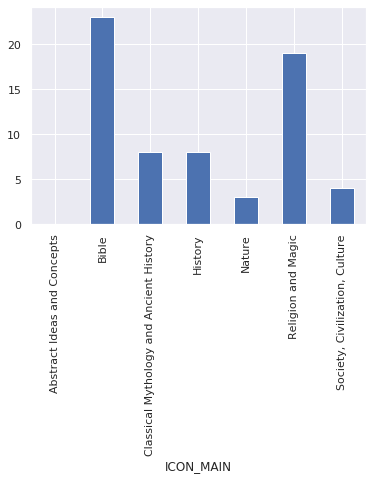

In [30]:
# Your code here
data=df.groupby('ICON_MAIN').Area.count()
data.plot(kind='bar')

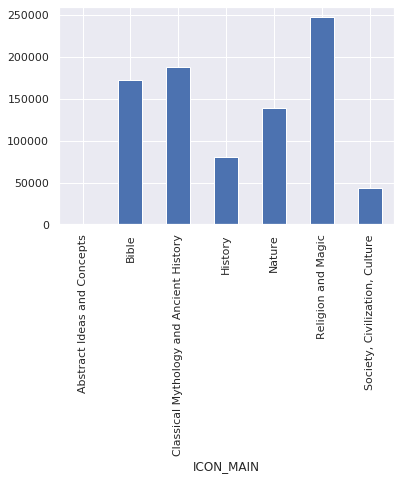

In [25]:
data=df.groupby('ICON_MAIN').Area.sum()
data.plot(kind='bar')

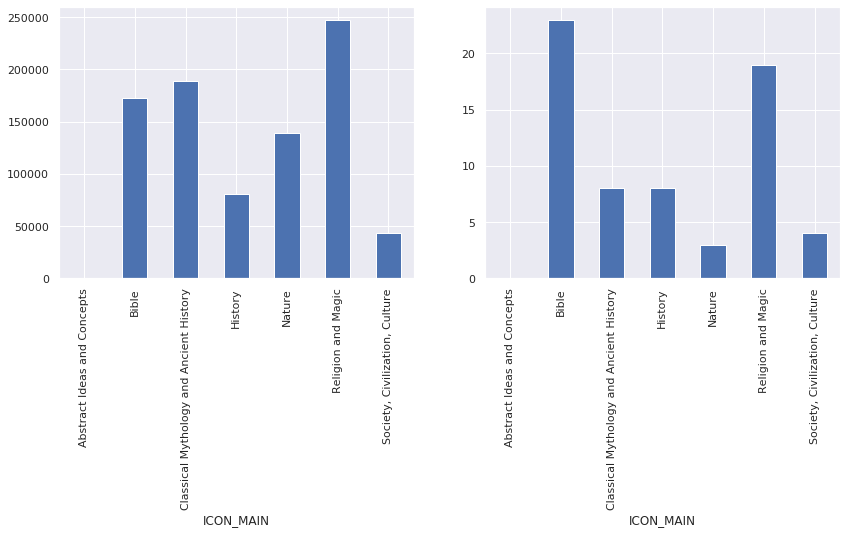

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
df.groupby('ICON_MAIN').Area.sum().plot(ax=axes[0], kind='bar')
df.groupby('ICON_MAIN').Area.count().plot(ax=axes[1], kind='bar')

In [32]:
pd.__version__

'0.24.1'

## Last questions

### More precise analysis

Of course, there is much more to be done that we are doing here. For instance can you adapt and rerun your code so that we display the statistics based on the second level iconography and not the top-level?

### Sampling bias

There are multiple records which are not in the final analysis, because one of the necessary field was not available or not parsed properly. Can you count the percentage of records missing in this analysis? Does it change the conclusions?

In [86]:
# Your code here